<a href="https://colab.research.google.com/github/Mrsbl465/AED_P02/blob/main/Laboratorio_03_Ruelas_Quenaya_Merisabel_CG_2024A_EPCC_UNSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 03**


* **Nombre:** Merisabel Ruelas Quenaya
* **Docente:** Rosa Y. G. Paccotacya Yanque
* **Curso:** Computación Gráfica
* **Grupo:** B

## **EJERCICIOS**

- Implemente las funciones de erosión y dilatación. No puede usar funciones predefinidas de OpenCV.
- Pruebe sus funciones con los ejercicios vistos en clases (Slides 16 y 19)
- Mejore las imágenes adjuntas usando las funciones implementadas.
- Explique si uso dilatación y/o erosión y cual fue su elemento estructurante.

Saving final_f.jpg to final_f (2).jpg


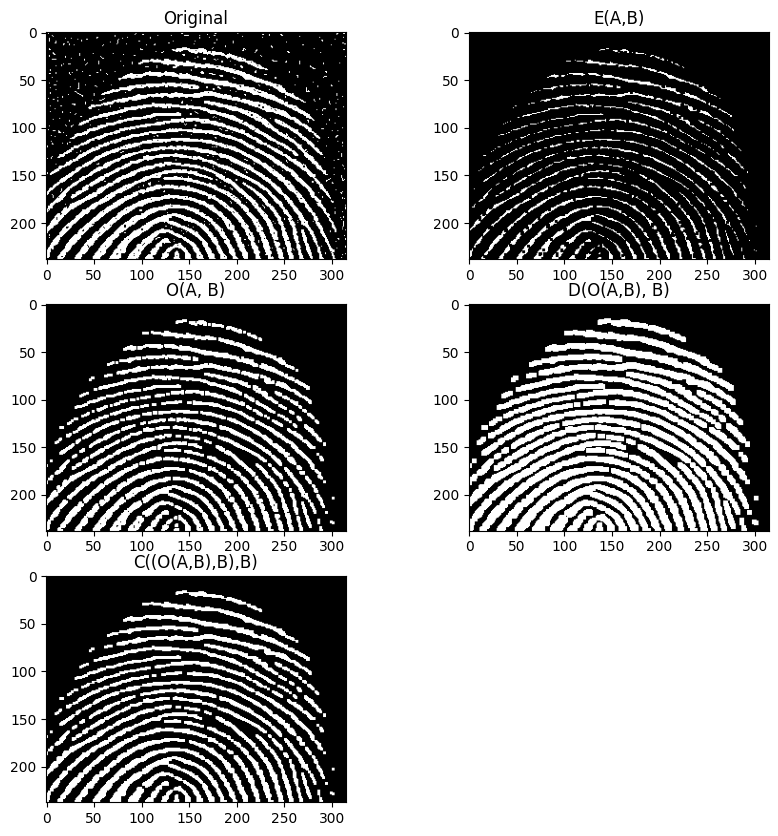

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def generate_structuring_element(shape='rectangle', size=3):
    if shape == 'rectangle':
        return np.ones((size, size), np.uint8)
    elif shape == 'circle':
        radius = size // 2
        se = np.zeros((size, size), np.uint8)
        center = (radius, radius)
        for i in range(size):
            for j in range(size):
                if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                    se[i, j] = 1
        return se
    else:
        print("Error")
        return None

def erosion(img, SE):
    imgErode = np.zeros_like(img)
    padding = SE.shape[0] // 2
    imgPad = np.pad(img, padding, mode='edge')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgErode[i, j] = np.min(imgPad[i:i+SE.shape[0], j:j+SE.shape[1]])
    return imgErode

def dilation(img, SE):
    imgDilate = np.zeros_like(img)
    padding = SE.shape[0] // 2
    imgPad = np.pad(img, padding, mode='edge')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgDilate[i, j] = np.max(imgPad[i:i+SE.shape[0], j:j+SE.shape[1]])
    return imgDilate

# Leer imagen
uploaded = files.upload()
filename = next(iter(uploaded))

img = plt.imread(filename)
#img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
img_finger = plt.imsave("finger.png", img, cmap="gray")


SE = generate_structuring_element('circle', 3)
AeB = erosion(img, SE)  # Erosionar la imagen
AoB = dilation(AeB, SE)  # Dilatar la imagen erosionada. Esto da la operación de apertura
AoBdB = dilation(AoB, SE)  # Dilatar la imagen abierta seguida de erosión. Esto dará el cierre de la imagen abierta
AoBdBeB = erosion(AoBdB, SE)

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(3,2,2)
plt.title("E(A,B)")
plt.imshow(AeB, cmap="gray")
plt.subplot(3,2,3)
plt.title("O(A, B)")
plt.imshow(AoB, cmap="gray")
plt.subplot(3,2,4)
plt.title("D(O(A,B), B)")
plt.imshow(AoBdB, cmap="gray")
plt.subplot(3,2,5)
plt.title("C((O(A,B),B),B)")
plt.imshow(AoBdBeB, cmap="gray")
plt.imsave("fingerprint_filtered.png", AoBdBeB, cmap="gray")

Saving text.png to text.png


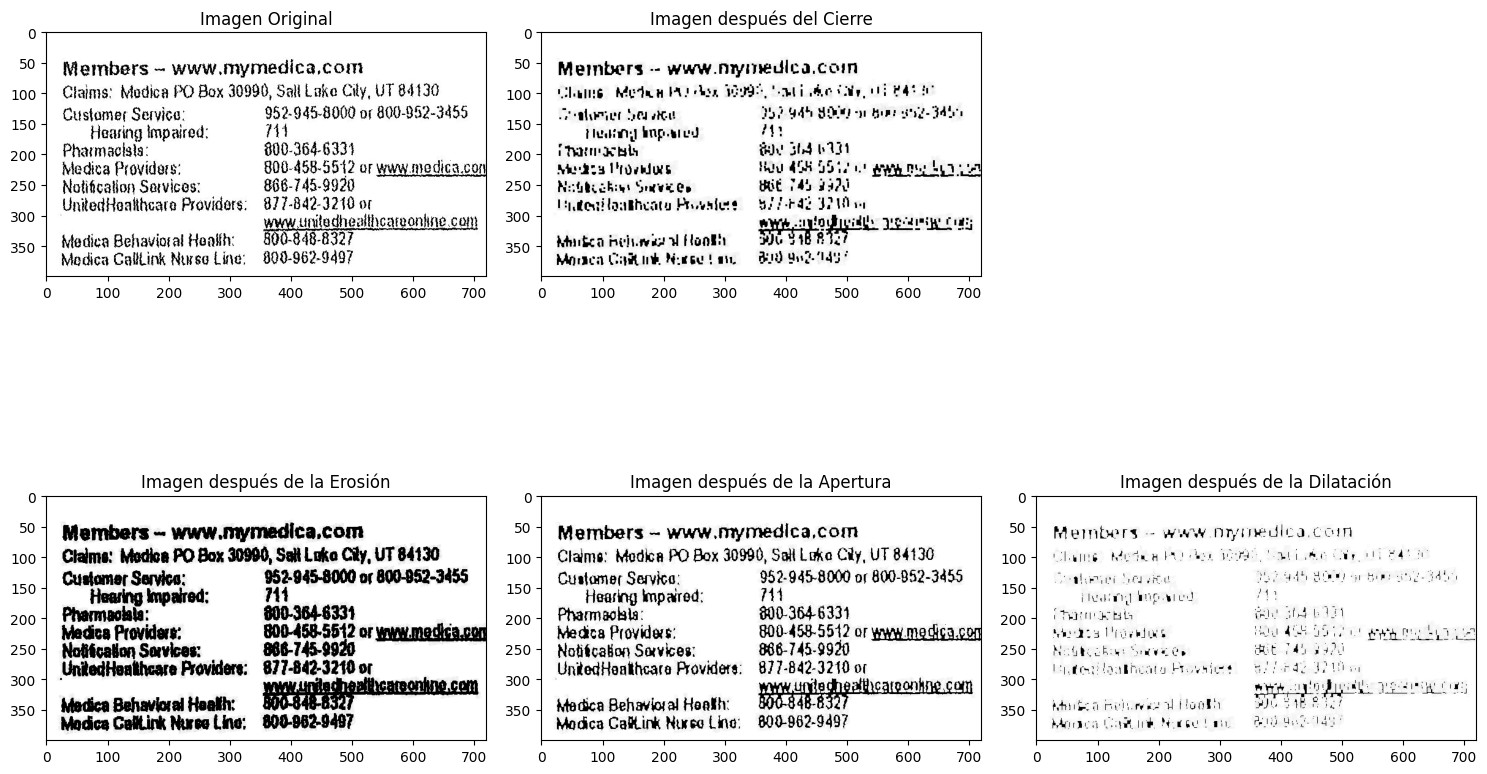

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def generate_structuring_element(shape='rectangle', size=3):
    if shape == 'rectangle':
        return np.ones((size, size), np.uint8)
    elif shape == 'circle':
        radius = size // 2
        se = np.zeros((size, size), np.uint8)
        center = (radius, radius)
        for i in range(size):
            for j in range(size):
                if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                    se[i, j] = 1
        return se
    else:
        print("Error")
        return None

def erosion(img, SE):
    imgErode = np.zeros_like(img)
    padding = SE.shape[0] // 2
    imgPad = np.pad(img, padding, mode='edge')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgErode[i, j] = np.min(imgPad[i:i+SE.shape[0], j:j+SE.shape[1]])
    return imgErode

def dilation(img, SE):
    imgDilate = np.zeros_like(img)
    padding = SE.shape[0] // 2
    imgPad = np.pad(img, padding, mode='edge')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgDilate[i, j] = np.max(imgPad[i:i+SE.shape[0], j:j+SE.shape[1]])
    return imgDilate

# Leer imagen
uploaded = files.upload()
filename = next(iter(uploaded))

img = plt.imread(filename)
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])



# Generar el elemento estructurante
SE = generate_structuring_element('circle', 3)

# Erosionar la imagen
AeB = erosion(img, SE)

# Dilatar la imagen erosionada para obtener la operación de apertura
AoB = dilation(AeB, SE)

# Dilatar la imagen abierta
AoBdB = dilation(AoB, SE)

# Erosionar la imagen dilatada para obtener el cierre de la imagen abierta
AoBdBeB = erosion(AoBdB, SE)

# Crear una figura para mostrar las imágenes
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mostrar la imagen original más grande
axs[0, 0].imshow(img, cmap="gray")
axs[0, 0].set_title("Imagen Original")

# Mostrar la imagen después de la erosión
axs[1, 0].imshow(AeB, cmap="gray")
axs[1, 0].set_title("Imagen después de la Erosión")

# Mostrar la imagen después de la apertura
axs[1, 1].imshow(AoB, cmap="gray")
axs[1, 1].set_title("Imagen después de la Apertura")

# Mostrar la imagen después de la dilatación
axs[1, 2].imshow(AoBdB, cmap="gray")
axs[1, 2].set_title("Imagen después de la Dilatación")

# Mostrar la imagen final más grande
axs[0, 1].imshow(AoBdBeB, cmap="gray")
axs[0, 1].set_title("Imagen después del Cierre")

# Eliminar el subplot vacío
fig.delaxes(axs[0,2])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Guardar la imagen final
plt.imsave("finger_filtered.png", AoBdBeB, cmap="gray")
